In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

Częstotliwość: 141.22222222222223 miesięcy, amplituda: 7.900363799762433


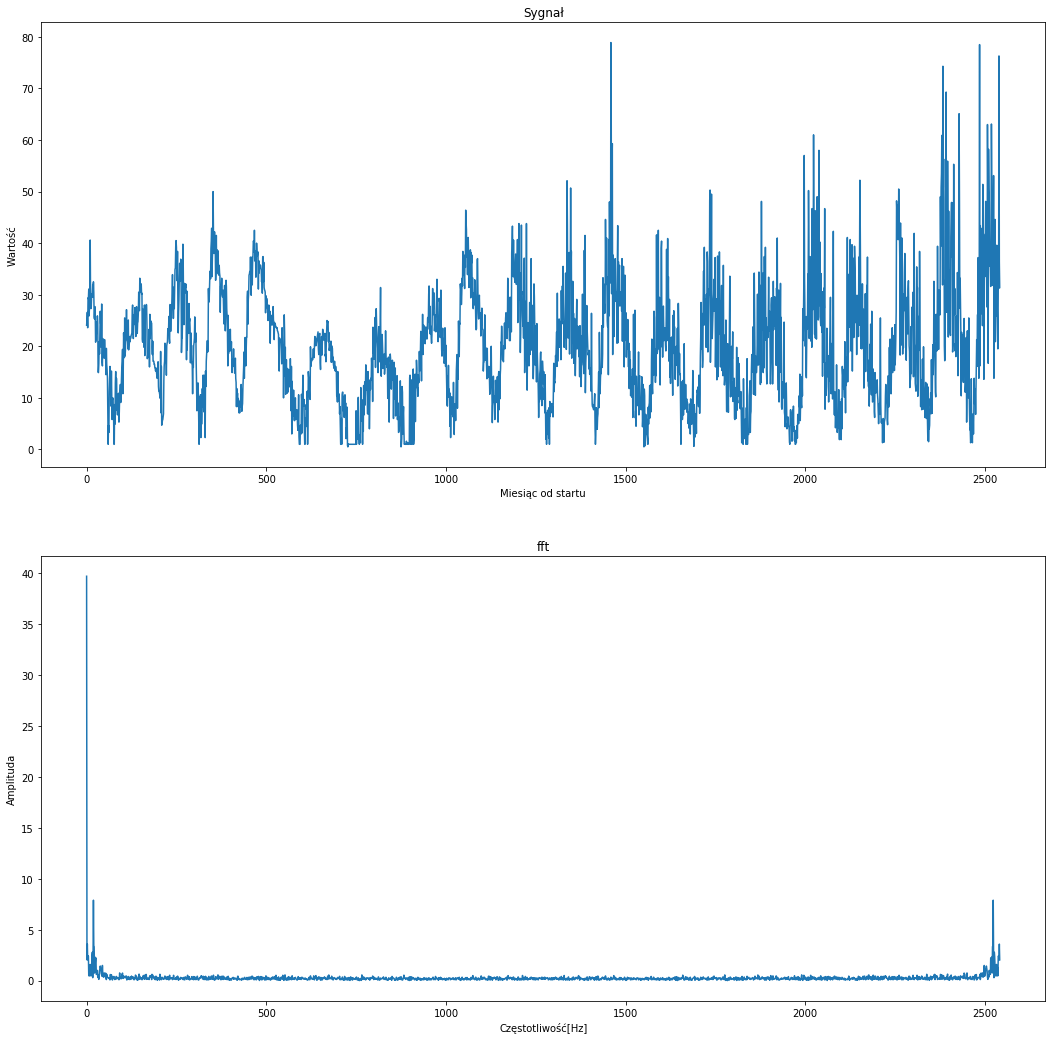

In [6]:
array=[float(x) for x in open('spots.txt').read().split()]
fig, ax=plt.subplots(2,1,figsize=(18,18))

ax[0].plot(range(len(array)), array)
ax[0].set_title('Sygnał')
ax[0].set_xlabel('Miesiąc od startu')
ax[0].set_ylabel('Wartość')

vt=2*abs(np.fft.fft(array))/len(vt)
ax[1].plot(range(len(array)), vt)
ax[1].set_title('fft')
ax[1].set_xlabel('Częstotliwość[Hz]')
ax[1].set_ylabel('Amplituda')
print('Częstotliwość: {} miesięcy, amplituda: {}'.format(len(vt)/np.argmax(vt[1:]), np.max(vt[1:])))
plt.show()

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

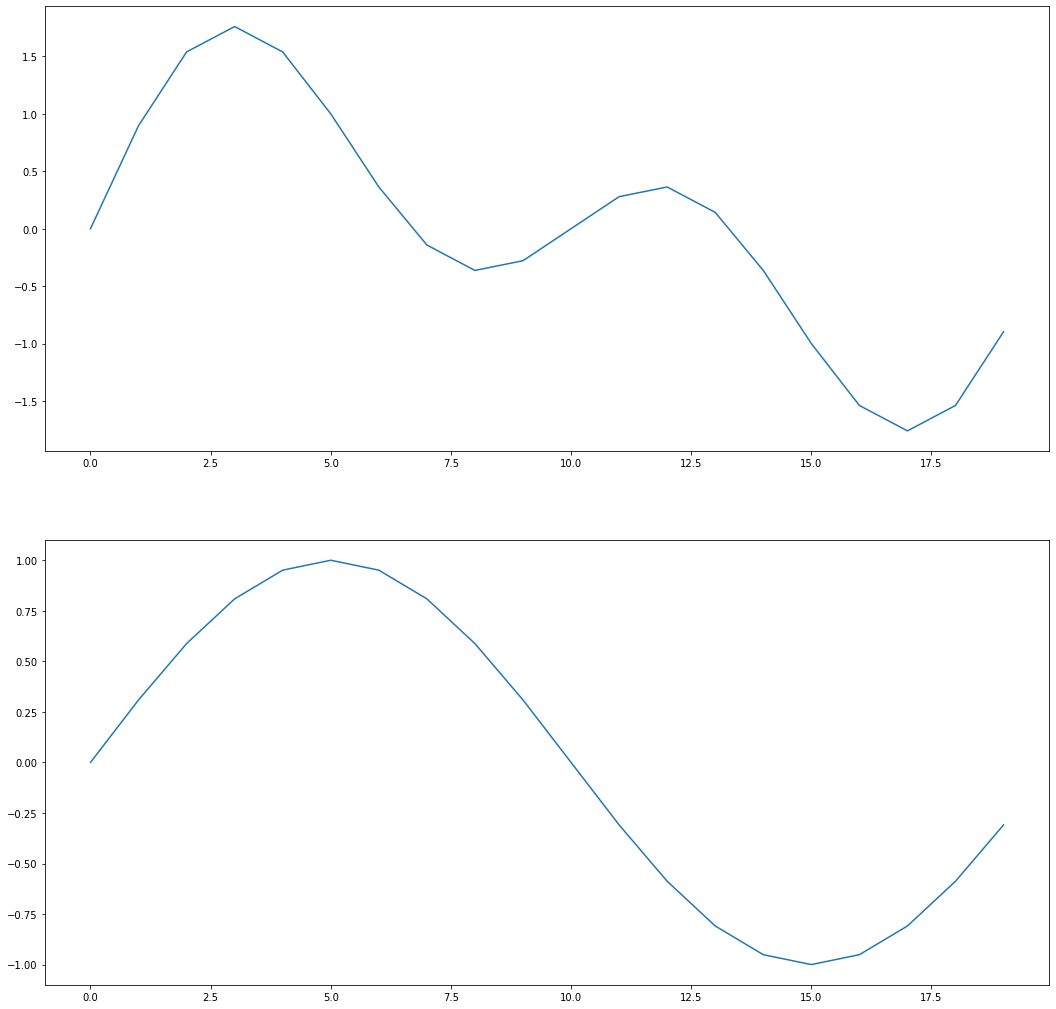

In [9]:
fig, ax=plt.subplots(2,1,figsize=(18,18))
T, w=1.0, 20
times=np.arange(0, T, 1/w)
fun=lambda t: np.sin(2*np.pi*t)+np.sin(4*np.pi*t)
ft=fun(times)

ax[0].plot(range(len(times)), ft)
ax[0].set_title('Pierwszy sygnał')

vt1=np.fft.fft(ft)
vt2=abs(vt1)
vt1[2]=vt1[-2]=0
vs=np.fft.ifft(vt1)
ax[1].plot(range(len(times)), vs)
ax[1].set_title('Poprawiony sygnał')

plt.show()

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

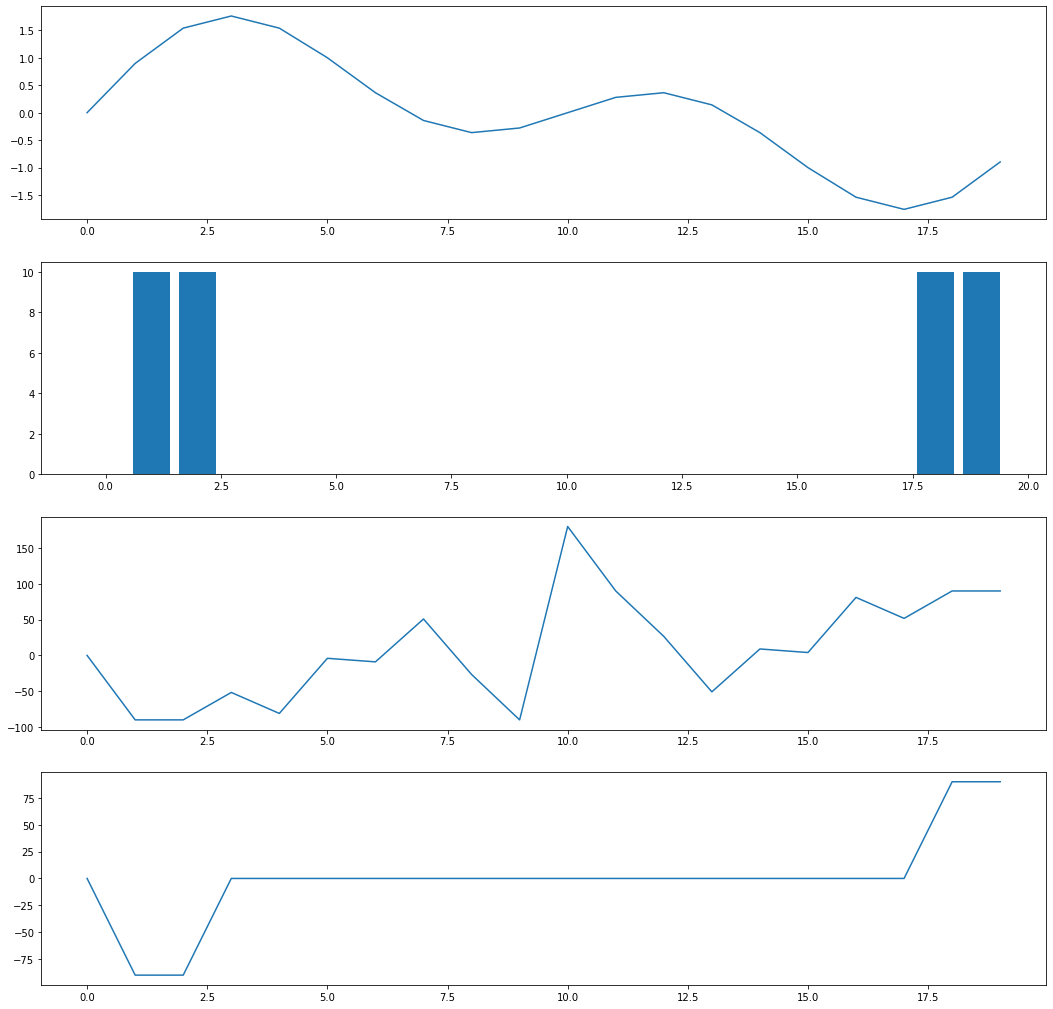

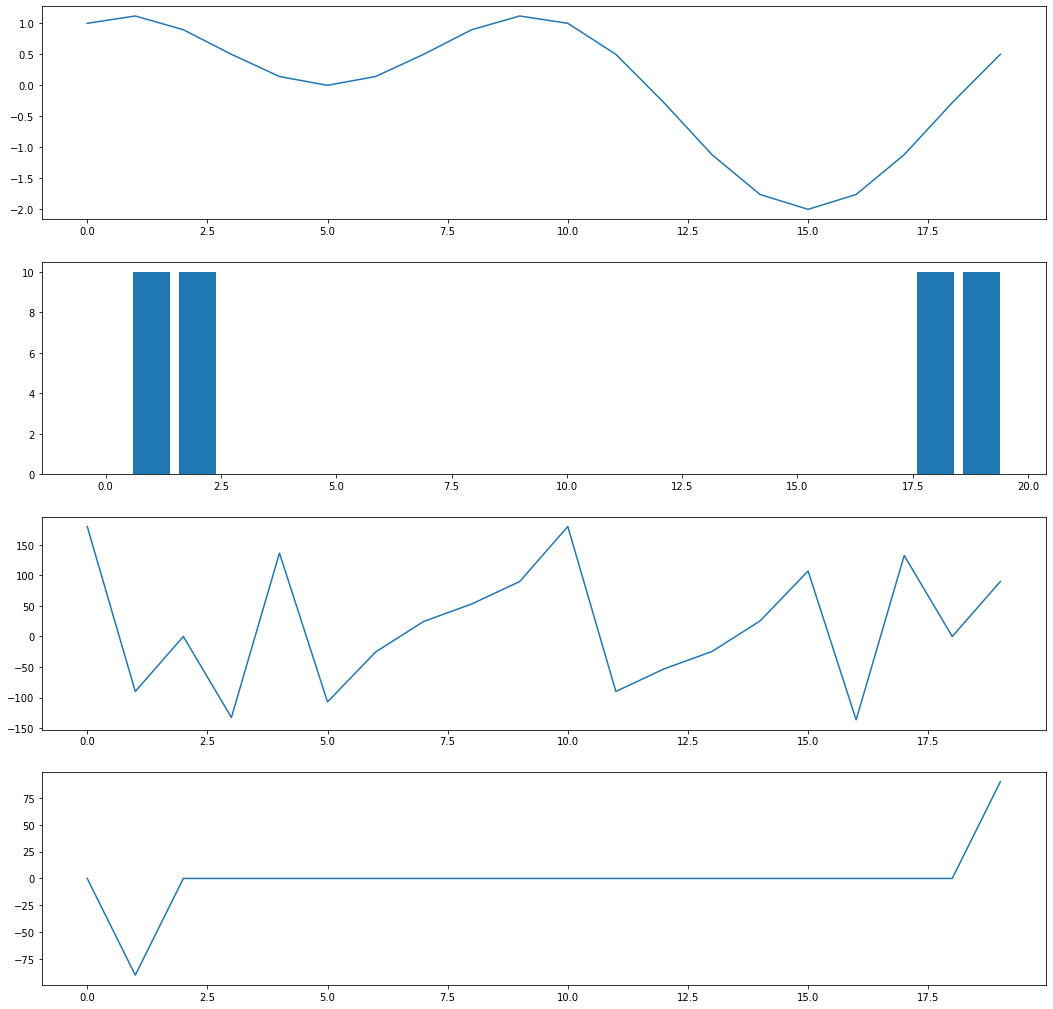

In [5]:
fig, ax=plt.subplots(4,1,figsize=(18,18))
T, w=1.0, 20
times=np.arange(0, T, 1/w)
fun=lambda t: np.sin(2*np.pi*t)+np.sin(4*np.pi*t)
ft=fun(times)

ax[0].plot(range(len(times)), ft)
vt1=np.fft.fft(ft)
vt2=abs(vt1)
ax[1].bar(range(len(ft)), vt2)
faza=np.angle(vt1, deg=True)
ax[2].plot(range(len(times)), faza)
faza[vt2<0.0001]=0
ax[3].plot(range(len(times)), faza)
plt.show()



fig, ax=plt.subplots(4,1,figsize=(18,18))
T, w=1.0, 20
times=np.arange(0, T, 1/w)
fun=lambda t: np.sin(2*np.pi*t)+np.cos(4*np.pi*t)
ft=fun(times)

ax[0].plot(range(len(times)), ft)
vt1=np.fft.fft(ft)
vt2=abs(vt1)
ax[1].bar(range(len(ft)), vt2)
faza=np.angle(vt1, deg=True)
ax[2].plot(range(len(times)), faza)
faza[vt2<0.0001]=0
ax[3].plot(range(len(times)), faza)
plt.show()

# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


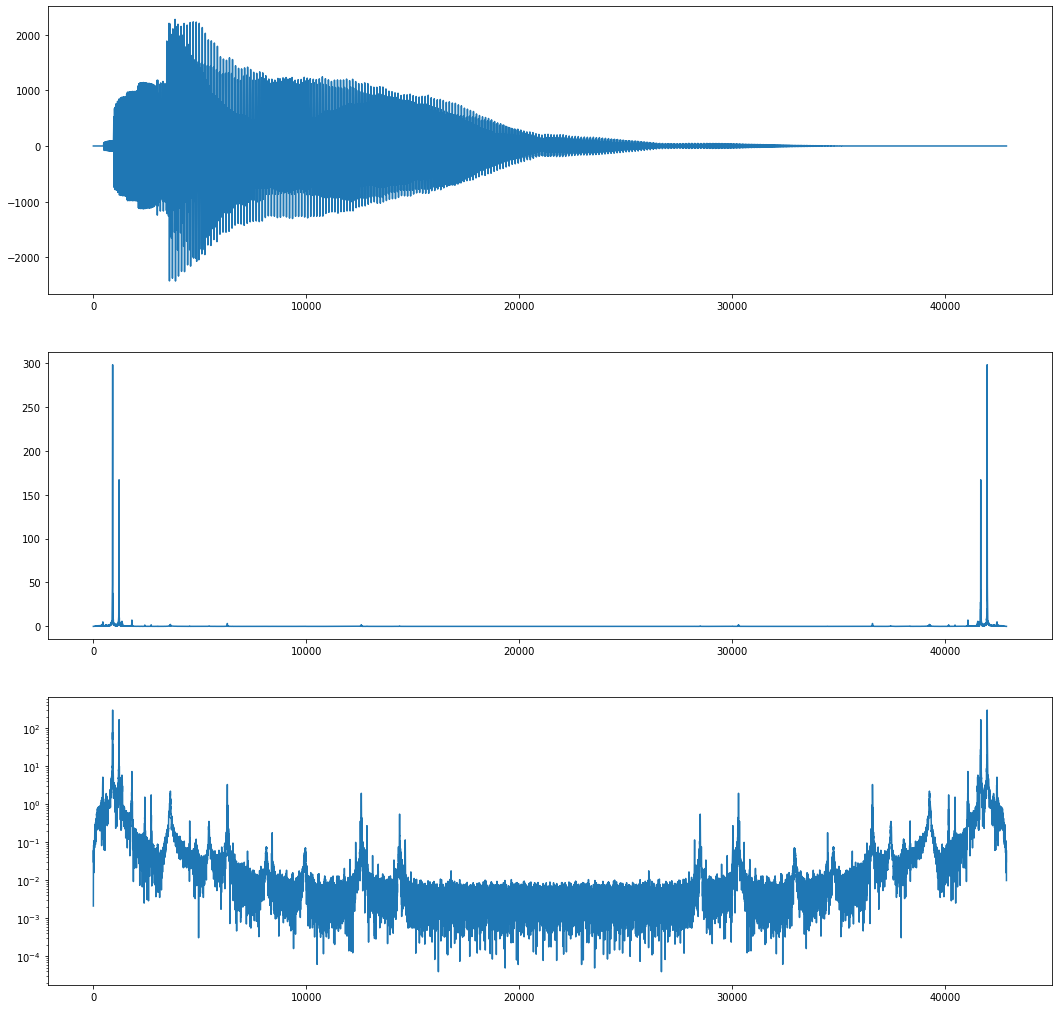

(906, 905, 904, 1208, 1209, 907, 1207, 903, 1210, 909)


In [10]:
import scipy.io.wavfile
w, signal = scipy.io.wavfile.read('err.wav')
signal = [s[0] for s in signal]
fig, ax=plt.subplots(3,1,figsize=(18,18))
ax[0].plot(signal)
sgn=2*abs(np.fft.fft(signal))/len(signal)

ax[1].plot(sgn)
ax[2].plot(sgn)
ax[2].set_yscale('log')
plt.show()

kvs=zip(sgn[:len(sgn)//2], range(len(sgn)//2))
kvs=sorted(kvs, key=lambda x:x[0])
print(list(zip(*list(kvs)[-10:]))[1][::-1])
